In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# load in data to a dataframe
# https://www.kaggle.com/datasets/ucsandiego/carbon-dioxide
df = pd.read_csv("CO2 Observations.csv")

In [23]:
# Data overview: 
# Columns 1-3: Provide the date in the following redundant formats: year, month and decimal date
# Column 4: Monthly CO2 concentrations in parts per million (ppm) measured on the 08A calibration scale and collected at 24:00 hours on the fifteenth of each month.
# Column 5: The fifth column provides the same data after a seasonal adjustment, which involves subtracting from the data a 4-harmonic fit with a linear gain factor to remove the seasonal cycle from carbon dioxide measurements
# Column 6: The sixth column provides the data with noise removed, generated from a stiff cubic spline function plus 4-harmonic functions with linear gain
# Column 7: The seventh column is the same data with the seasonal cycle removed.


In [59]:
# preview data 
df.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


In [65]:
df["Date"] = df["Decimal Date"].apply(decimal_year_to_date)
# Set date as the index
df.set_index('Date', inplace=True)  


In [67]:
df.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
Date,,,,,,,
1958-01-16,1958,1,1958.0411,NaN,NaN,NaN,NaN
1958-02-16,1958,2,1958.1260,NaN,NaN,NaN,NaN
1958-03-16,1958,3,1958.2027,315.69,314.42,316.18,314.89
1958-04-16,1958,4,1958.2877,317.45,315.15,317.30,314.98
1958-05-16,1958,5,1958.3699,317.50,314.73,317.83,315.06


In [7]:
# check column names and data types 
df.info()
# no missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
Year                                 720 non-null int64
Month                                720 non-null int64
Decimal Date                         720 non-null float64
Carbon Dioxide (ppm)                 703 non-null float64
Seasonally Adjusted CO2 (ppm)        703 non-null float64
Carbon Dioxide Fit (ppm)             707 non-null float64
Seasonally Adjusted CO2 Fit (ppm)    707 non-null float64
dtypes: float64(5), int64(2)
memory usage: 39.5 KB


In [9]:
# find the range of the dataset 
df.Year.min(), df.Year.max()

(1958, 2017)

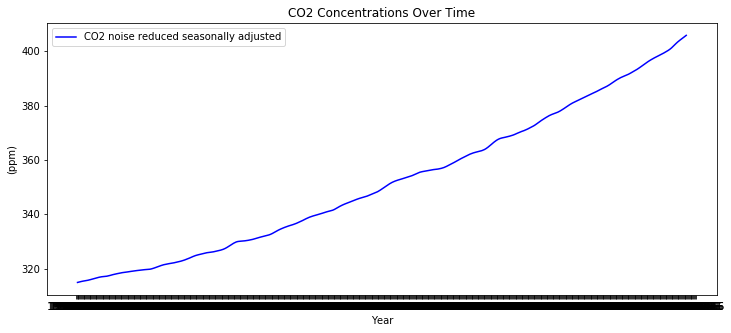

In [69]:
# CO2 trend over time 
plt.figure(figsize=(12, 5))
plt.plot(df.index[:], df['Seasonally Adjusted CO2 Fit (ppm)'][:], color='b', label='CO2 noise reduced seasonally adjusted')
plt.xlabel("Year")
plt.ylabel("(ppm)")
plt.title("CO2 Concentrations Over Time")
plt.legend()
plt.show()